### Data Load

In [3]:
from processor.processor import DataModule
data_module = DataModule()
train_loader = data_module.train_dataloader()

In [4]:
X, y = next(iter(train_loader))
X.shape, y.shape, len(data_module.dataset)

(torch.Size([32, 1, 224, 224]), torch.Size([32, 3, 224, 224]), 7129)

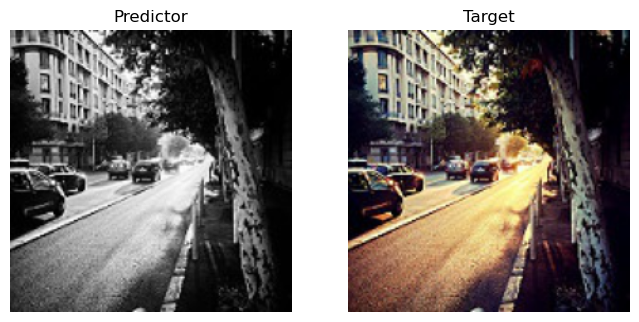

In [3]:
data_module.plot_sample(12)

### Training

In [1]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ProgressBar, ModelCheckpoint
from model.train_wrapper import AutoEncoder

model = AutoEncoder()

num_epochs = 2
# checkpoint_callback = ModelCheckpoint(monitor='val_loss')

trainer = Trainer(max_epochs=num_epochs, fast_dev_run=False) # , callbacks=[checkpoint_callback])
trainer.fit(model)

/home/kamil/miniconda3/envs/data-science/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/kamil/miniconda3/envs/data-science/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3050 Ti Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


In [2]:
trainer.test(model) 

You are using a CUDA device ('NVIDIA GeForce RTX 3050 Ti Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_loss_epoch       0.007551996968686581
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss_epoch': 0.007551996968686581}]

In [22]:
X0 = X[12][0]
y0 = y[12]
yhat0 = model(X)[12]

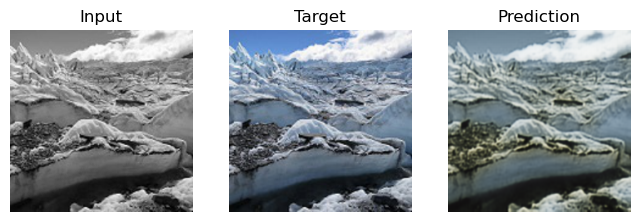

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(8,8))

ax[0].imshow(X0, cmap="gray")
ax[0].set_title("Input")
ax[0].axis("off")
ax[1].imshow(y0.permute(1, 2, 0))
ax[1].set_title("Target")
ax[1].axis("off")
ax[2].imshow(yhat0.permute(1, 2, 0).detach().numpy())
ax[2].set_title("Prediction")
ax[2].axis("off")

plt.show()